In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tables import *
import h5py
path = "/media/mitsy/ad-hoc-viso/ptne/2019-10-31/1-137-A-32.wav.1.hdf5"

f = h5py.File(path,"r")
print(f)
a=f["energy"]
plt.imshow(a)



<HDF5 file "1-137-A-32.wav.1.hdf5" (mode r)>


**Visualization of the raw data**

*PTNE files*

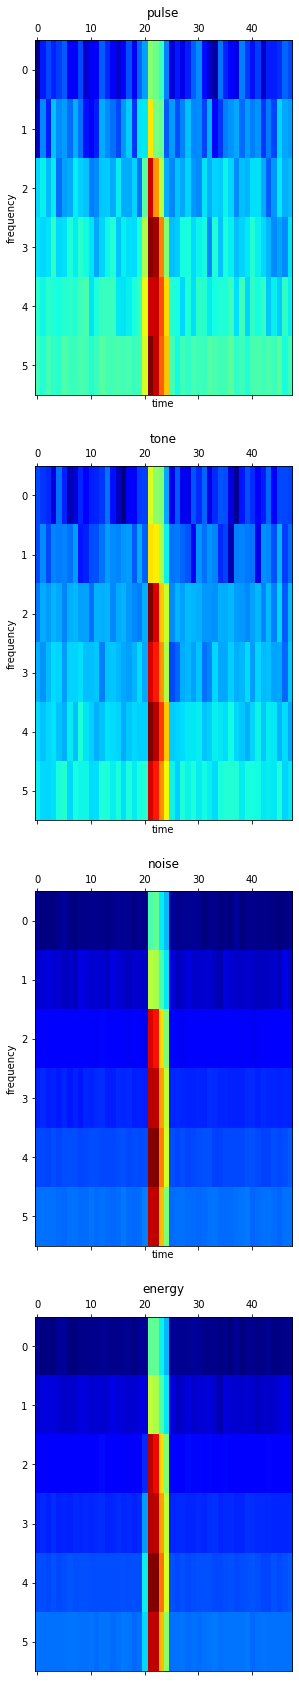

In [3]:
from tables import *
import os
directory = os.fsencode("/media/mitsy/ad-hoc-viso/ptne/2019-10-31/")
aspect=11.00
cnt2 = 0
for file in os.listdir(directory):
    path2 = os.path.join(directory, file)
    f2 = h5py.File(path2,"r")
    a=f2["pulse"]
    b=f2["tone"]
    c=f2["noise"]
    d=f2["energy"]
    fig, ax = plt.subplots(4, 1, figsize=(50,30))
    ax[0].set_title('pulse')
    ax[0].matshow(a, interpolation='nearest', cmap=cm.jet), ax[0].set_xlabel('time'),ax[0].set_ylabel('frequency')
    ax[0].set_aspect(aspect)
    ax[1].set_title('tone')
    ax[1].matshow(b, interpolation='nearest', cmap=cm.jet), ax[1].set_xlabel('time'),ax[1].set_ylabel('frequency')
    ax[1].set_aspect(aspect)
    ax[2].set_title('noise')
    ax[2].matshow(c, interpolation='nearest', cmap=cm.jet), ax[2].set_xlabel('time'),ax[2].set_ylabel('frequency')
    ax[2].set_aspect(aspect)
    ax[3].set_title('energy')
    ax[3].matshow(d, interpolation='nearest', cmap=cm.jet), ax[2].set_xlabel('time'),ax[2].set_ylabel('frequency')
    ax[3].set_aspect(aspect)
    cnt2 += 1
    plt.show()
    if (cnt2 >= 1):
        break
    

 

In [4]:
from scipy import stats

pathT=('/media/mitsy/ad-hoc-viso/TRACTS/2019-10-31/1-137-A-32.wav.1.hdf5')
fT = h5py.File(pathT,"r")
print(fT)
fT.keys()

<HDF5 file "1-137-A-32.wav.1.hdf5" (mode r)>


<KeysViewHDF5 ['E', 'f_tract', 's_tract']>

*Tract files*

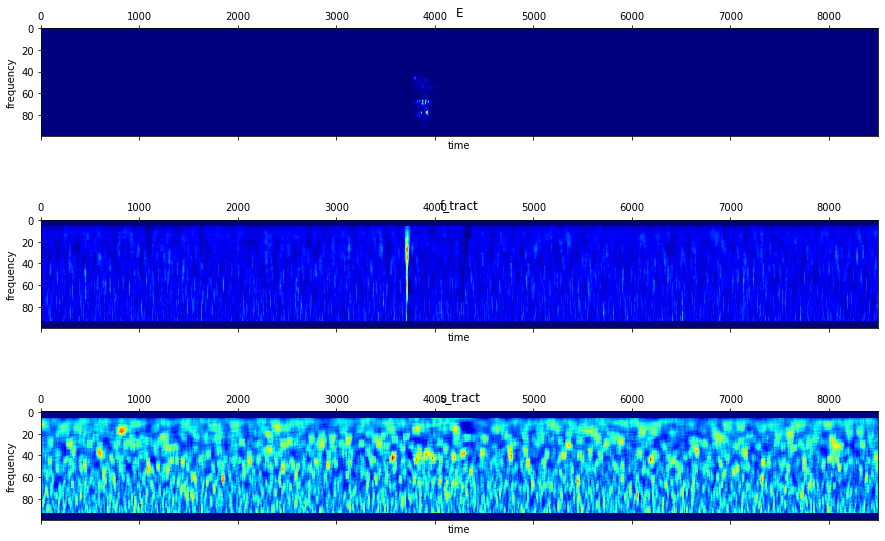

In [5]:
import os
directory2 = os.fsencode("/media/mitsy/ad-hoc-viso/TRACTS/2019-10-31/")
aspec = 11.00

cnt2 = 0
for file in os.listdir(directory2):
    path3 = os.path.join(directory2, file)
    f3 = h5py.File(path3,"r")
    aT=f3["E"]
    bT=f3["f_tract"]
    cT=f3["s_tract"]
    fig, ax = plt.subplots(3, 1, figsize=(15,10))
    ax[0].set_title('E')
    ax[0].matshow(aT, interpolation='nearest', cmap=cm.jet), ax[0].set_xlabel('time'),ax[0].set_ylabel('frequency')
    ax[0].set_aspect(aspec)
    ax[1].set_title('f_tract')
    ax[1].matshow(bT, interpolation='nearest', cmap=cm.jet), ax[1].set_xlabel('time'),ax[1].set_ylabel('frequency')
    ax[1].set_aspect(aspec)
    ax[2].set_title('s_tract')
    ax[2].matshow(cT, interpolation='nearest', cmap=cm.jet), ax[2].set_xlabel('time'),ax[2].set_ylabel('frequency')
    ax[2].set_aspect(aspec)

    cnt2 += 1
    plt.show()
    if (cnt2 >= 1):
        break

In [6]:
import pandas as pd

csv = pd.read_csv (r'/home/mitsy/mysandbox/data/ESC-50-master/meta/esc50.csv')
cat = ['dog', 'chirping_birds', 'vacuum_cleaner', 'thunderstorm', 'door_wood_knock', 'can_opening']
print(len(cat))

cat_column = pd.DataFrame(csv, columns= ['category'])
index_cat=list()   
for i in cat:
    cnt=0
    for index, row in cat_column.iterrows():
        categories = row['category']
        if(i==categories):
            one_index_one_cat=[index,i]
            index_cat.append(one_index_one_cat)
            
            
            #here I want to save the indexes to the i, making the 6x6 array when the loop "for i in cat" finished
            cnt+= 1
            if(cnt==6):
                break

print(index_cat) #now we have a list that has six indexes with its six corresponding categories from the CSV

6
[[0, 'dog'], [14, 'dog'], [157, 'dog'], [158, 'dog'], [170, 'dog'], [296, 'dog'], [1, 'chirping_birds'], [179, 'chirping_birds'], [180, 'chirping_birds'], [191, 'chirping_birds'], [192, 'chirping_birds'], [216, 'chirping_birds'], [2, 'vacuum_cleaner'], [3, 'vacuum_cleaner'], [89, 'vacuum_cleaner'], [90, 'vacuum_cleaner'], [91, 'vacuum_cleaner'], [220, 'vacuum_cleaner'], [4, 'thunderstorm'], [5, 'thunderstorm'], [16, 'thunderstorm'], [119, 'thunderstorm'], [120, 'thunderstorm'], [126, 'thunderstorm'], [6, 'door_wood_knock'], [9, 'door_wood_knock'], [10, 'door_wood_knock'], [139, 'door_wood_knock'], [261, 'door_wood_knock'], [362, 'door_wood_knock'], [7, 'can_opening'], [203, 'can_opening'], [208, 'can_opening'], [291, 'can_opening'], [299, 'can_opening'], [323, 'can_opening']]


In [7]:
import statistics

k_means_input=list()

for i in range(36):
    filename = '/media/mitsy/ad-hoc-viso/ptne/2019-10-31/' + csv.iloc[index_cat[i][0]]['filename'] + '.1.hdf5'
    fff = h5py.File(filename,"r")
    p=fff["pulse"]
    p_quantile = np.mean(np.quantile(p,0.9,axis=1))
    t=fff["tone"]
    t_quantile= np.mean(np.quantile(t,0.9,axis=1))
    n=fff["noise"]
    n_quantile= np.mean(np.quantile(n,0.9,axis=1))
    e=fff["energy"]
    e_quantile= np.mean(np.quantile(e,0.9,axis=1))
    k_means_input.append([p_quantile,t_quantile,n_quantile,e_quantile])

k_means_input=np.array(k_means_input)

now I have the matrix that is going to be processed by the k means algorithm. It is composed by the mean of the 10% highest value of each one of the 6 frecuencies of each component (pulse, tone, noise and energy) of the 36 files

In [8]:
from sklearn.cluster import KMeans

n_clusters = 20
k_means = KMeans(n_clusters=n_clusters, n_init=10).fit(k_means_input)


labels=k_means.labels_
print(labels)


[ 2  2 16 13  7 13  4 16  4  5 15  8 10 10  4  1  1  6  5  8 12  1  1  3
  9  3  0 19  8 17  5 14 11  3 18 12]


I need a dataframe with 4 coulmns: index, k value, original category, predicted category first three coulmns can be consulted and built with pandas dataframe fourth column: for each k value: consult what is the original category of each file and write the most repeated for each k value for each file in the pandas dataframe write the prediction corresponding to the value of k

make the confusion matrix with the original category vs predicted category columns


In [9]:
index_cat_df = pd.DataFrame(index_cat, columns=['Index_in_CSV','Original_category'])
labels_df=pd.DataFrame(labels, columns=['k_means_label'])

In [10]:
#dataframe with three first columns
index_originalCat_k=pd.concat((index_cat_df,labels_df),axis=1)


**DataFrame with indexes, k values, original categories, predicted categories**

In [11]:
#list of predicted categories
mode_k=list()
for i in range(n_clusters):
    mode_k.append(index_originalCat_k[index_originalCat_k.k_means_label==i].Original_category.mode()[0])

lista=list()
for index, row in index_originalCat_k.iterrows():
    k_values=row['k_means_label']
    lista.append(mode_k[k_values])

lista_df=pd.DataFrame(lista, columns=['Predicted_category'])
index_originalCat_k_predictedCat=pd.concat((index_originalCat_k,lista_df),axis=1)
print(lista)
index_originalCat_k_predictedCat

['dog', 'dog', 'chirping_birds', 'dog', 'dog', 'dog', 'chirping_birds', 'chirping_birds', 'chirping_birds', 'can_opening', 'chirping_birds', 'chirping_birds', 'vacuum_cleaner', 'vacuum_cleaner', 'chirping_birds', 'thunderstorm', 'thunderstorm', 'vacuum_cleaner', 'can_opening', 'chirping_birds', 'can_opening', 'thunderstorm', 'thunderstorm', 'can_opening', 'door_wood_knock', 'can_opening', 'door_wood_knock', 'door_wood_knock', 'chirping_birds', 'door_wood_knock', 'can_opening', 'can_opening', 'can_opening', 'can_opening', 'can_opening', 'can_opening']


,Index_in_CSV,Original_category,k_means_label,Predicted_category
0,0,dog,2,dog
1,14,dog,2,dog
2,157,dog,16,chirping_birds
3,158,dog,13,dog
4,170,dog,7,dog
5,296,dog,13,dog
6,1,chirping_birds,4,chirping_birds
7,179,chirping_birds,16,chirping_birds
8,180,chirping_birds,4,chirping_birds
9,191,chirping_birds,5,can_opening


**Confusion Matrix**

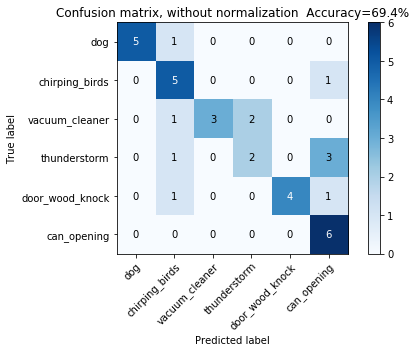

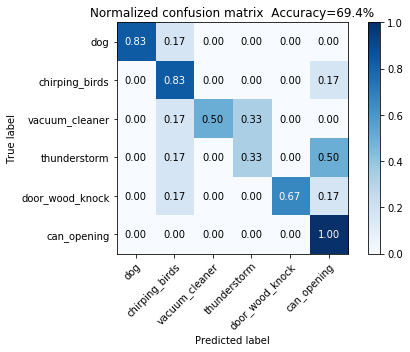

In [12]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

#list of true values that's going inside the confusion matrix
true_list=list() 
for index, row in index_originalCat_k.iterrows():
    Original_Category=row['Original_category']
    for i in range(len(cat)):
        if(cat[i]==Original_Category):
            true_list.append(i)
            
#list of predicted values that's going inside the confusion matrix            
pred_list=list()
for index, row in lista_df.iterrows():
    Predicted_Category=row['Predicted_category']
    for i in range(len(cat)):
        if(cat[i]==Predicted_Category):
            pred_list.append(i)
            
cat_names= np.array(cat)#array of categories



def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix  '
        else:
            title = 'Confusion matrix, without normalization  '

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
   
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(7,5))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title+'Accuracy='+np.array2string(100*(np.trace(cm)/np.sum(cm)),precision=1)+'%',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
    


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(true_list, pred_list, classes=cat_names)
# Plot normalized confusion matrix
plot_confusion_matrix(true_list, pred_list, classes=cat_names, normalize=True)

plt.show()

Increasing the number of clusters makes the accuracy higher. For 10 clusters the accuracy =52.8%, for 20 clusters the accuracy is 69.4%

**Clustering for TRACT files**

-Remove zeros
-Flaten files 
-Obtain distances with KS comparing s_tract and f_tract of the files
-Obtain distance matrix 
-Use clustering algorithm with distance matrix
-Plot confusion matrix and accuracy for 2 different numbers of clusters
-Plot dendrogram

In [13]:
#experiment with the files to see how I need to modify them to perform HAC
for i in range(len(index_cat)):
    filename = '/media/mitsy/ad-hoc-viso/TRACTS/2019-10-31/' + csv.iloc[index_cat[i][0]]['filename'] + '.1.hdf5'
    ff = h5py.File(filename,"r") 
    eT=ff["E"]
    fT=ff["f_tract"]
    sT=ff["s_tract"]
cnt=0
cnt2=0
for i in range(50):
        if(fT[i][0]==0):
            cnt+= 1
            
for i in range(100):
        if(fT[i][0]==0):
            cnt2+= 1

print(cnt)#6 first rows of zeros on the f_tract file
print(cnt2)#also 6 last rows of zeros

cnt=0
cnt2=0
for i in range(50):
        if(sT[i][0]==0):
            cnt+= 1
            
for i in range(100):
        if(sT[i][0]==0):
            cnt2+= 1
print(cnt)#6 first rows of zeros on the s_tract file
print(cnt2)#also 6 last rows of zeros
#I need to cut the first and last 44 rows of s_tract and f_tract of the 36 files

6
12
6
12


In [ ]:
#Distance matrix that I will need for aglomerative clustering
from tqdm import tqdm
from scipy import stats
import math
distance_matrix=np.zeros([len(index_cat),len(index_cat)])
for i in range(len(index_cat)):
    #print('cut zeros and flatten file i '+format(i))
    filenamei = '/media/mitsy/ad-hoc-viso/TRACTS/2019-10-31/' + csv.iloc[index_cat[i][0]]['filename'] + '.1.hdf5'
    ffi = h5py.File(filenamei,"r") 
    fTi=ffi["f_tract"][6:94,:].flatten()
    sTi=ffi["s_tract"][6:94,:].flatten()
    for j in range(len(index_cat)):
        if(j==i):
            #print('i is '+format(i)+' and j is '+format(j)+ ' , i=j so distance matrix value is zero, we continue with next value of j')
            continue
        if(j<i):
            #print('i is '+format(i)+' and j is '+format(j)+ ', j<i so we continue with next value of j')
            continue
        else:
            #print('i is '+format(i)+' and j is '+format(j)+ ', j is bigger than i so we cut and flatten file j and calculate the distance')
            filenamej = '/media/mitsy/ad-hoc-viso/TRACTS/2019-10-31/' + csv.iloc[index_cat[j][0]]['filename'] + '.1.hdf5'
            ffj = h5py.File(filenamej,"r")
            fTj=ffj["f_tract"][6:94,:].flatten()
            sTj=ffj["s_tract"][6:94,:].flatten()
            D_f_tract,p= stats.ks_2samp(fTi, fTj)
            D_s_tract,p= stats.ks_2samp(sTi,sTj)
            E_distance=(D_f_tract*D_f_tract)+(D_s_tract*D_s_tract)
            E_distance=math.sqrt(E_distance)
            distance_matrix[i][j]=E_distance
            distance_matrix[j][i]=distance_matrix[i][j]#simetric
            
            

    

In [ ]:
#save file
distance_matrix_h = h5py.File('/home/mitsy/mysandbox/aml-aed-challenge-mitsyprada/ML_clustering/' + 'distance_matrix.hdf5', mode = 'w')
distance_matrix_h.create_dataset('distance_matrix', data=distance_matrix)
distance_matrix_h.close()

In [14]:
#read file
distance_matrix_h=h5py.File('/home/mitsy/mysandbox/aml-aed-challenge-mitsyprada/ML_clustering/' + 'distance_matrix.hdf5', mode = 'r')
distance_matrix_h.keys()
distance_matrix=distance_matrix_h["distance_matrix"]

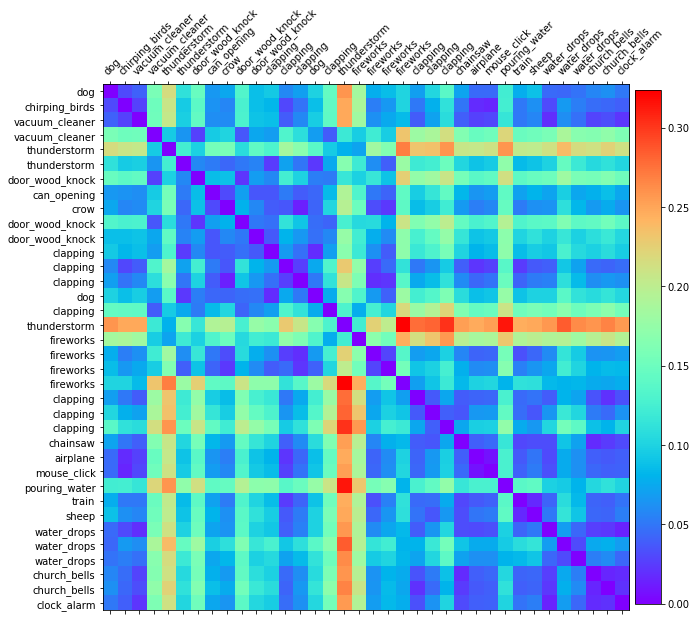

In [15]:
#Representation of distance matrix
index_cat_df=pd.DataFrame(index_cat, columns=['index','category'])
indexes=list()
for index, row in index_cat_df.iterrows():
       indexes.append(index)
v=list(csv.iloc[indexes]['category'])
fig, ax = plt.subplots(figsize=(10,10))
im=ax.matshow(distance_matrix[:,:], interpolation='nearest', cmap=cm.rainbow)
ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.01)
# ax.set_ylim(bottom=len(v)-5,top=0.5)
ax.set_xticks(range(len(v)))
ax.set_yticks(range(len(v)))
ax.set(xticklabels=v,yticklabels=v)
plt.setp(ax.get_xticklabels(), rotation=45, rotation_mode="anchor", ha="left")
plt.show()

In [19]:
#aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
n_clusters=10
AgglomerativeClustering=AgglomerativeClustering(n_clusters=n_clusters,affinity='precomputed',linkage='average').fit(distance_matrix)
AC_labels=AgglomerativeClustering.labels_

#data frame with index, original category, AC labels and predicted category
AC_labels_df=pd.DataFrame(AC_labels, columns=['AC_label'])
#dataframe with three first columns
Idx_OCat_AClabel=pd.concat((index_cat_df,AC_labels_df),axis=1)
#list of predicted categories
Idx_OCat_AClabel
mode_AC=list()
for i in range(n_clusters):
    mode_AC.append(Idx_OCat_AClabel[Idx_OCat_AClabel.AC_label==i].category.mode()[0])
    
list1=list()
for index, row in Idx_OCat_AClabel.iterrows():
    AC_values=row['AC_label']
    list1.append(mode_AC[AC_values])

list1_df=pd.DataFrame(list1, columns=['Predicted_category'])
index_originalCat_AC_predictedCat=pd.concat((Idx_OCat_AClabel,list1_df),axis=1)
index_originalCat_AC_predictedCat

,index,category,AC_label,Predicted_category
0,0,dog,4,can_opening
1,14,dog,1,door_wood_knock
2,157,dog,1,door_wood_knock
3,158,dog,2,chirping_birds
4,170,dog,8,dog
5,296,dog,0,chirping_birds
6,1,chirping_birds,2,chirping_birds
7,179,chirping_birds,0,chirping_birds
8,180,chirping_birds,0,chirping_birds
9,191,chirping_birds,2,chirping_birds


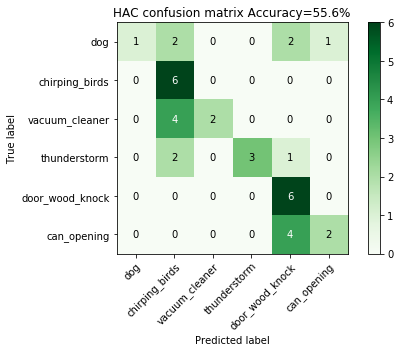

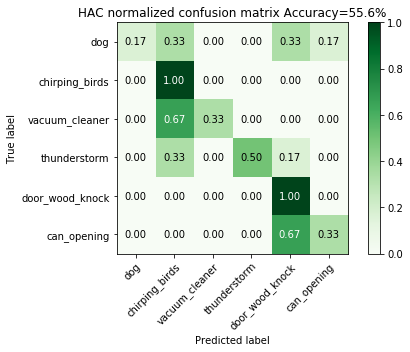

In [21]:
#list of true values that's going inside the confusion matrix
true_list=list() 
for index, row in Idx_OCat_AClabel.iterrows():
    Original_Category=row['category']
    for i in range(len(cat)):
        if(cat[i]==Original_Category):
            true_list.append(i)
            
#list of predicted values that's going inside the confusion matrix            
pred_list=list()
for index, row in list1_df.iterrows():
    Predicted_Category=row['Predicted_category']
    for i in range(len(cat)):
        if(cat[i]==Predicted_Category):
            pred_list.append(i)
            
cat_names= np.array(cat)#array of categories

plot_confusion_matrix(true_list, pred_list, classes=cat_names, normalize=False,title='HAC confusion matrix ',cmap=plt.cm.Greens)
plot_confusion_matrix(true_list, pred_list, classes=cat_names, normalize=True,title='HAC normalized confusion matrix ',cmap=plt.cm.Greens)

Increasing the number of clusters makes the accuracy higher.This is a slightly lower accuracy for the same number of clusters, compared to the k-means algorithm.
K means: 10 clusters, 52.8%
         20 clusters, 69.4%
HAC: 10 clusters, 55.6%
     20 clusters, 77.8%

to do: 
data frame with predicted categories
confusion matrix
representation (dendogram

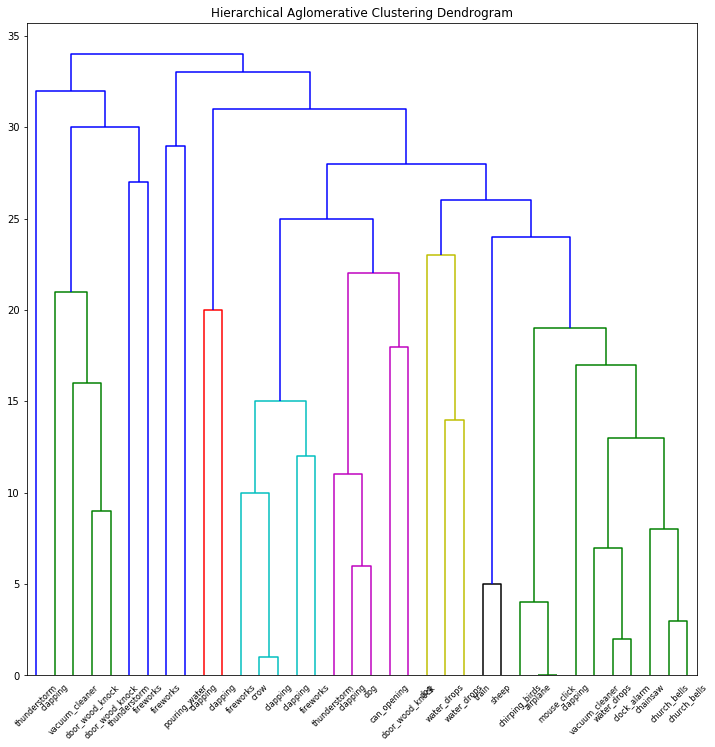

In [22]:
#HAC Dendrogram
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(12, 12))
plt.title('Hierarchical Aglomerative Clustering Dendrogram')
linkage_matrix = np.column_stack([AgglomerativeClustering.children_,
np.arange(AgglomerativeClustering.children_.shape[0]),
np.arange(2, AgglomerativeClustering.children_.shape[0]+2)]).astype(float)
dendrogram(linkage_matrix, labels=v)
plt.show()